In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import seaborn as sns

Data Jobs in Germany

In [2]:
df_Ger = df[df['job_country'] == 'Germany'].copy()

df_Ger_Data_jobs = df_Ger['job_title_short'].value_counts().reset_index()

sns.barplot(data=df_Ger_Data_jobs, x='count', y='job_title_short',hue='count',palette='dark:b_r')
plt.title('Number of Jobs per Job Title')
plt.xlabel('Jobs count')
plt.ylabel("Jobs position")
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

Companies to Explore

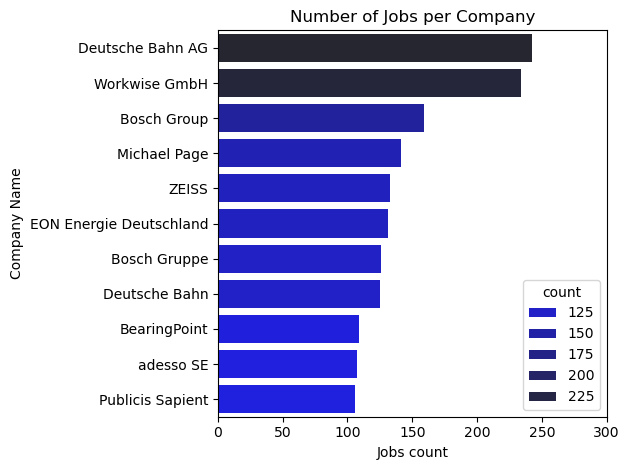

In [ ]:
df_Ger_companies = df_Ger['company_name'].value_counts().head(11).reset_index()

sns.barplot(data=df_Ger_companies, x='count', y='company_name',hue='count',palette='dark:b_r')
plt.title('Number of Jobs per Company')
plt.xlabel('Jobs count')
plt.xlim(0,300)
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

Job Opportunities

In [ ]:
df_Ger.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
566783,Data Engineer,Big Data Engineer,"Berlin, Germany",via BeBee Deutschland,Full-time,False,Germany,2023-03-26 09:15:38,False,False,Germany,None,NaN,NaN,CENTA MG GmbH,"[python, scala, matlab, r, sql, nosql, cassand...","{'cloud': ['aws', 'azure'], 'databases': ['cas..."


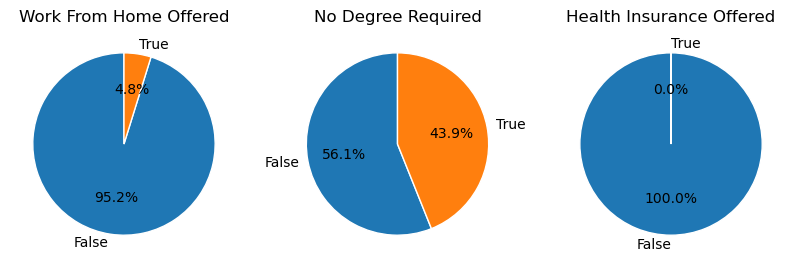

In [ ]:
fig, ax= plt.subplots(1,3,figsize=(10, 6))


dict = {
    'job_work_from_home':'Work From Home Offered',
    'job_no_degree_mention':'No Degree Required',
    'job_health_insurance':'Health Insurance Offered'
}

for i,(column,title) in enumerate(dict.items()):
    df_Ger[column].value_counts().plot(kind='pie',
                                       ax=ax[i],labels=['False', 'True'],
                                       startangle=90,autopct="%1.1f%%",
                                       wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    ax[i].set_title(title)

    ax[i].set_ylabel('')


Data Analysts Job in Germany

In [ ]:
df_Ger.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None
78,Senior Data Scientist,Senior Data Expert,"Berlin, Germany",via Jobs Trabajo.org,Full-time,False,Germany,2023-10-27 13:13:25,False,False,Germany,None,NaN,NaN,SIXT Germany,"[sql, excel, looker, sap]","{'analyst_tools': ['excel', 'looker', 'sap'], ..."
104,Software Engineer,Senior Software Engineer - Metadata,"Berlin, Germany",via Snowflake Careers,Full-time,False,Germany,2023-10-27 13:13:54,False,False,Germany,None,NaN,NaN,Snowflake,"[c++, java, snowflake]","{'cloud': ['snowflake'], 'programming': ['c++'..."


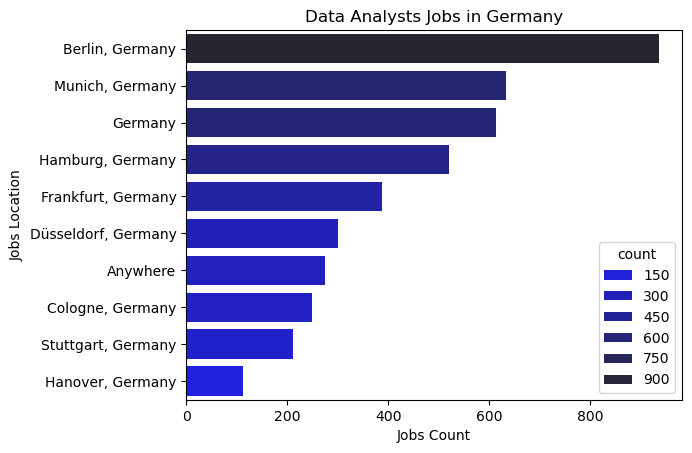

In [ ]:
df_Ger_DA = df_Ger[df_Ger['job_title_short'] == 'Data Analyst'].copy()

df_Ger_DA_location = df_Ger_DA['job_location'].value_counts().head(10).reset_index()

sns.barplot(data=df_Ger_DA_location, x='count', y='job_location', hue='count', palette='dark:b_r')
plt.title('Data Analysts Jobs in Germany')
plt.xlabel('Jobs Count')
plt.ylabel('Jobs Location')
plt.show()

Data Analyst Salaries in Germany

In [ ]:
df_Ger_DA = df_Ger_DA.dropna(subset='salary_year_avg')

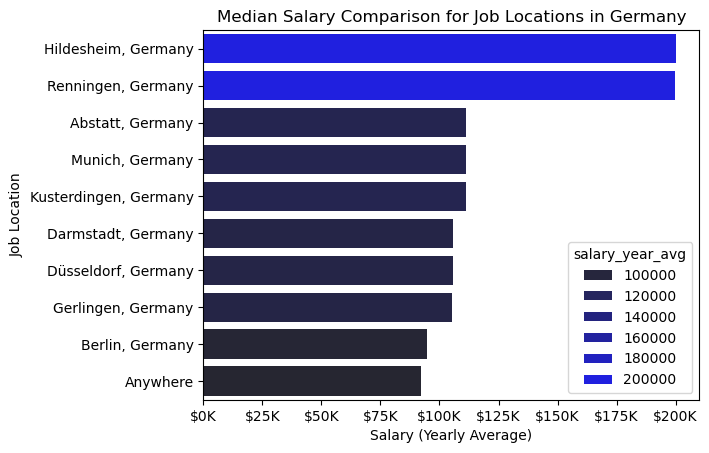

In [ ]:
df_Ger_DA_pay = (df_Ger_DA.groupby(['job_location'])['salary_year_avg']
                 .agg('median')
                 .reset_index()
                 .sort_values(by='salary_year_avg',ascending=False))

df_Ger_DA_pay = df_Ger_DA_pay.head(10)
sns.barplot(data=df_Ger_DA_pay, x='salary_year_avg', y='job_location',hue='salary_year_avg',palette='dark:b')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('Median Salary Comparison for Job Locations in Germany')
plt.xlabel('Salary (Yearly Average)')  # Label for x-axis
plt.ylabel('Job Location')  # Label for y-axis

# Show the plot
plt.show()